### Instructions for running this notebook:

This notebook serves two functions:
Firstly it generates our presentation! What you see is automatically converted into the live coding presentation that you'll see in the workshop.
Secondly, it serves as a follow along worksheet for you to try out what you see! Any gaps and questions left unanswered will be filled in live during our workshop, try your best to fill in the gaps as we go.

## Welcome to the Quantum Track of the UMD Bitcamp Hackathon!

## What to expect:
1. We will look at Quantum Circuits and the `qiskit` `QuantumCircuit` object
2. We will look at what a Quantum Gate is and how to apply them in `qiskit`
3. We will look at Quantum Simulation on classical computers and how to test our Quantum Circuits

# 1. The Quantum Circuit:

<img src="https://github.com/Plabrum/umd_hackathon/blob/main/static/images/circuit_signpost.png?raw=true" width= 80%>

We read circuits from **left** to **right**, each horizontal line is a seperate **qubit**, and all qubits are initialized in the $|0\rangle$ state.

### Let's start by importing all the necessary libraries
We specifically need maths: `numpy`, quantum: `qiskit`, and graphing ability: `matplotlib`

In [1]:
# Importing standard Qiskit libraries
import qiskit as q
import qiskit.visualization as qv
import numpy as np
import matplotlib.pyplot as plt

Today we will be using the IBM Quantum Systems.
If you choose to run a local notebook instead of the IBM Quantum Experience you'll need to do this:

In [ ]:
# Saving your IBM Q Experience
my_personal_token = "copy_your_personal_token_here"
q.IBMQ.save_account(my_personal_token)

Then run this to load in your IBM Q account:

In [3]:
provider = q.IBMQ.load_account()

# Quantum Gates

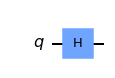

In [2]:
qc = q.QuantumCircuit(1)
qc.h(0)
qc.draw("mpl")

### Let's see what's happening here on the bloch sphere:

So Far we have applied

<img src="https://github.com/Plabrum/umd_hackathon/blob/main/static/animations/h_gate.gif?raw=true" width=30%>

In [ ]:
#### This is a skipped cell (it will not show on the presentation) ####

# not necessary to run, this code creates the previous visualization (it takes a while but it is cool) 
qv.visualize_transition(qc, trace=True)

## The X gate, aka NOT Gate

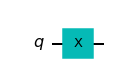

In [5]:
qc2 = q.QuantumCircuit(1)
qc2.x(0)
qc2.draw("mpl")

<img src="https://github.com/Plabrum/umd_hackathon/blob/main/static/animations/x_gate.gif?raw=true" width=30%>

## The Y gate

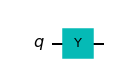

In [8]:
qc3 = q.QuantumCircuit(1)
qc3.y(0)
qc3.draw("mpl")

<img src="https://github.com/Plabrum/umd_hackathon/blob/main/static/animations/y_gate.gif?raw=true" width=30%>

## The Z gate, aka the Phase Gate

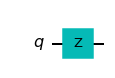

In [27]:
qc4 = q.QuantumCircuit(1)
qc4.z(0)
qc4.draw("mpl")

<img src="https://github.com/Plabrum/umd_hackathon/blob/main/static/animations/z_gate.gif?raw=true" width=30%>

Notice anything strange? Nothing seems to happen - this is because rotating an arrow in place will not show anything!

## Now we can apply an H Gate first

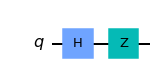

In [13]:
qc5 = q.QuantumCircuit(1)
qc5.h(0)
qc5.z(0)
qc5.draw("mpl")

<img src="https://github.com/Plabrum/umd_hackathon/blob/main/static/animations/hz_gate.gif?raw=true" width=30%>

### Reversability of Gates

What happens if we apply 2 of the same gates back to back?

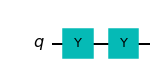

In [15]:
qc6 = q.QuantumCircuit(1)
qc6.y(0)
qc6.y(0)
qc6.draw("mpl")

<img src="https://github.com/Plabrum/umd_hackathon/blob/main/static/animations/yy_gate.gif?raw=true" width=30%>

What about 4 gates? Is this a fluke?

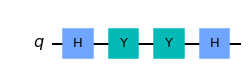

In [17]:
qc7 = q.QuantumCircuit(1)
qc7.h(0)
qc7.y(0)
qc7.y(0)
qc7.h(0)
qc7.draw("mpl")

<img src="https://github.com/Plabrum/umd_hackathon/blob/main/static/animations/hyyh_gate.gif?raw=true" width=30%>

### Cool, Right!

# Using Quantum Computers and Simulating Quantum Circuits

Step 1: Create a quantum circuit with 1 qubit and 1 classical bit

In [16]:
qc = q.QuantumCircuit(1,1)

Step 2: Add an H gate to your circuit and draw it

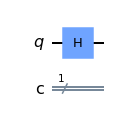

In [17]:
qc.h(0)
qc.draw("mpl")

## Unlike classical circuits we need to add in measurement gates
Step 3: Add a measurement to your circuit

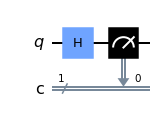

In [18]:
qc.measure(0,0)
qc.draw("mpl")

Step 4: Run your circuit using the `QASM` simulator

In [19]:
# Setting up and running the QASM simulator.
backend = q.Aer.get_backend('qasm_simulator') # Choosing the simulator we want to use
job = q.execute(qc, backend, shots = 1024) # Running the simulator - specifying the circuit we want to simulate and the number of times we want to simulate it (shots)
result = job.result() # Getting the result from the simulator

In [20]:
print(result)

Result(backend_name='qasm_simulator', backend_version='0.10.3', qobj_id='2c966b21-195c-4e0d-ba98-f3304990762e', job_id='217146b2-d082-48a6-ad8e-a42aa9fd6ae4', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 522, '0x1': 502}), header=QobjExperimentHeader(clbit_labels=[['c', 0]], creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, metadata=None, n_qubits=1, name='circuit-7', qreg_sizes=[['q', 1]], qubit_labels=[['q', 0]]), status=DONE, seed_simulator=3914465189, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'parallel_state_update': 4, 'parallel_shots': 1, 'device': 'CPU', 'active_input_qubits': [0], 'measure_sampling': True, 'num_clbits': 1, 'input_qubit_map': [[0, 0]], 'num_qubits': 1, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.001996686)], date=2022-03-21T13:59:47.377602, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', ba

## What on earth was that...
We need to make that human readable:

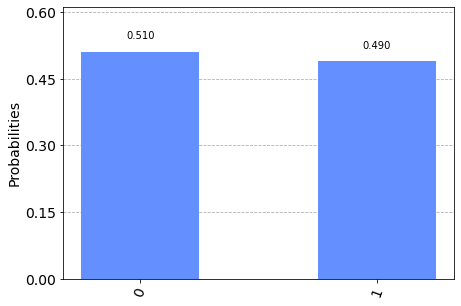

In [21]:
counts = result.get_counts() 
qv.plot_histogram(counts)

# Enough of this simulator stuff, Let me at the real deal!

There are only a few publicly available computers so we need to wait in a queue to use them

In [2]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
print(backend)

NameError: name 'provider' is not defined

In [ ]:
# job = execute(qc, backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)